# ObsID : 0945070132, SRCNUM : 1, Instru : EPN
**Simbad :** Gamma-ray Source *4FGL J0333.4-2705* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4016018930&Name=4FGL%20J0333.4-2705&submit=submit).

## ESASky

https://sky.esa.int/esasky/?target=53.383375%20-27.15480555555556&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033331.9-270916
- IAU name : 4XMM J033331.9-270916
- RA : 03h 33m 31.917s
- DEC : -27° 09' 16.80"

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas
- G : 19.9017

``eROSITA``

- IAUNAME : 1eRASS J033331.8-270916
- RA : 03h 33m 31.807s
- DEC : -27° 09' 16.29"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945070132PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.097e-01 +/- 3.006e-03 (94.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-34
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.29e+04 sec
 Using fit statistic: chi
 Using Background File                P0945070132PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.29e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945070132PNS003SRCARF0001.FTZ



In [4]:
n_cts = 1.097e-01*1.29e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 1415.13


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (34) ignored in spectrum #     1



(-0.5, 860.5, 664.5, -0.5)

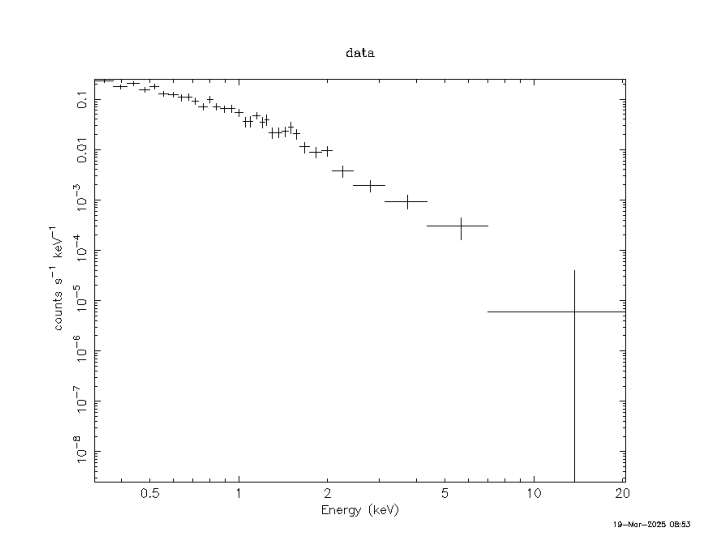

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.069244e+12     using 33 bins.

Te

(-0.5, 854.5, 666.5, -0.5)

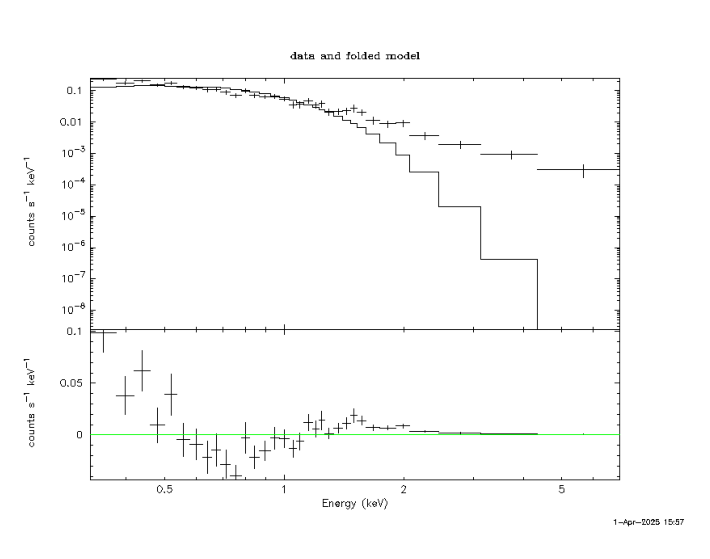

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.051986e+10     using 33 bins.

Test statistic : Chi-Squared              2.051986e+10     using 33 bins.
 Null hypothesis probability of 0.000000e+00 with 30 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
1212.16      16.9419      -3      0.104009       34.9097   2.39940e-05
1202.08      936651       -4     0.0518767       198.621   3.69232e-05
1010.46      644387       -1     0.0149402       5.44026   3.46483e-05


(-0.5, 851.5, 656.5, -0.5)

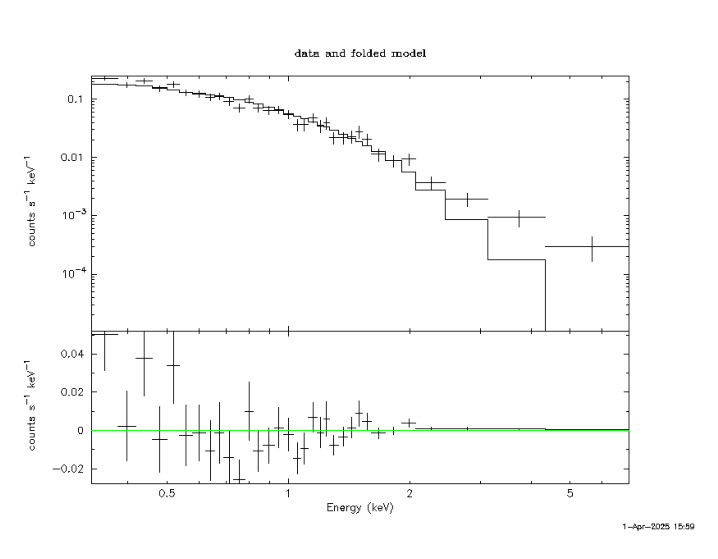

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.476767e+09     using 33 bins.

Test statistic : Chi-Squared              1.476767e+09     using 33 bins.
 Null hypothesis probability of 0.000000e+00 with 30 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
808.7        62.2147      -3      0.746687      0.752221   

(-0.5, 854.5, 656.5, -0.5)

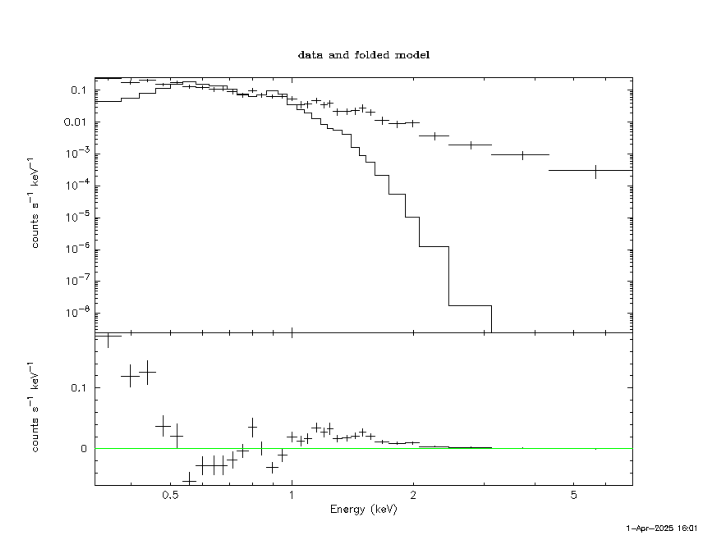

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model (Third best fit)

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.768053e+11     using 33 bins.

Test statistic : Chi-Squared              1.768053e+11     using 33 bins.
 Null hypothesis probability of 0.000000e+00 with 30 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1115.25      14.2816       0     0.0390067       1.17809   1.88860e-05
952.344      1.68036e+06  -1     0.0193721       1.79935   2.99194e-05
111.711      1.96174e+06  -2   0.000245661       3.21521   9.30654e-0

(-0.5, 852.5, 655.5, -0.5)

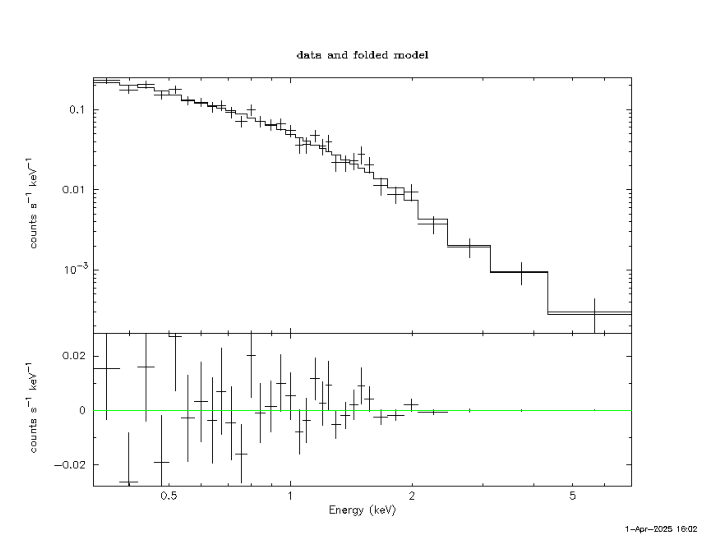

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model (Second best fit)

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.066724e+12     using 33 bins.

Test statistic : Chi-Squared              2.066724e+12     using 33 bins.
 Null hypothesis probability of 0.000000e+00 with 28 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1308.28      317524  

(-0.5, 854.5, 659.5, -0.5)

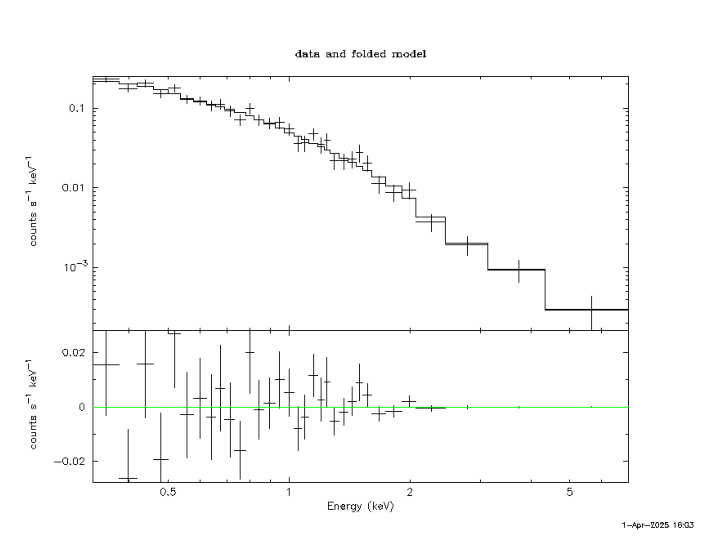

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model (Best fit)

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.121260e+11     using 33 bins.

Test statistic : Chi-Squared              3.121260e+11     using 33 bins.
 Null hypothesis probability of 0.000000e+00 with 28 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1100.27      94560.5

(-0.5, 854.5, 654.5, -0.5)

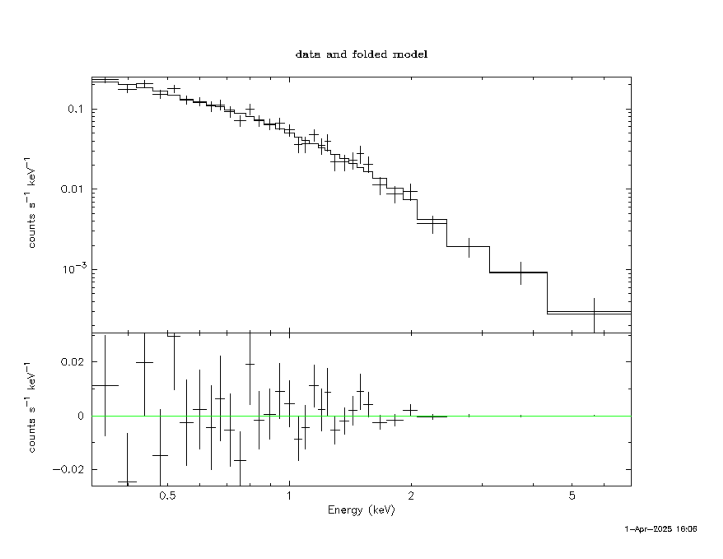

In [19]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA =  53.3829856°
- Dec = -27.1546672°

53.38 -27.15

**Column density :** nH = 4*10^20 cm^-2

In [21]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Third best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 101614.6207369181

bremss
(tbabs) : 49715.68644917403

apec
(tbabs) : 6.891414006029544e+21

powerlaw (Third best fit)
(tbabs) : 1.640470310862369e+20

bbody+powerlaw (Second best fit)
(tbabs) : 1.640470310862369e+20

bremss+powerlaw (Best fit)
(tbabs) : 1.640470310862369e+20


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss + Powerlaw`` with Chi-squared = 23.0064 using 33 bins: **8.2863e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Black body + Powerlaw`` with Chi-squared = 23.5673 using 33 bins: **7.5349e-13 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Powerlaw`` with Chi-squared = 23.5743 using 33 bins: **7.4534e-13 ergs/cm^2/s**.

In [2]:
Flux_bp = 8.2863e-13 # ergs/cm^2/s
Flux_bbp = 7.5349e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray = {Flux_bbp} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 8.2863e-13 ergs/cm^2/s
Black body + Powerlaw : F_x-ray = 7.5349e-13 ergs/cm^2/s


### Optical flux

In [3]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.9017

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.1495008561535016e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [4]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bbp/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw : F_x-ray/F_optical = 7.208607071183831
Black body + Powerlaw : F_x-ray/F_optical = 6.554932046952566


## Luminosity

In [6]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
Luminosity_bbp = 4*np.pi*Flux_bbp*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = {Luminosity_bp} erg/s")
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_bbp} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Bremss + Powerlaw : L_x-ray = 2.5967419793035135e+33 erg/s
Black body + Powerlaw : L_x-ray = 2.3612699443483874e+33 erg/s
